In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

***12 étapes vers Navier–Stokes***
======
***

Ce note-book Jupyter poursuit la présentation des **12 étapes vers Navier–Stokes**, le module pratique enseigné dans la classe interactive CFD de [Prof. Lorena Barba] (http://lorenabarba.com). Vous devriez avoir terminé [Step 1](./01_FR_Step_1.ipynb) avant de continuer, avoir écrit votre propre script ou note-book Python et avoir expérimenté en faisant varier les paramètres de la discrétisation et en observant ce qui se passe.

Étape 2 : Convection non linéaire
-----
***

Nous allons maintenant implémenter la convection non linéaire en utilisant les mêmes méthodes qu'à l'étape 1. L'équation de convection en 1D est :
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Au lieu d'un facteur constant $c$ multipliant le second terme, nous avons maintenant la solution $u$ le multipliant. Ainsi, le deuxième terme de l'équation est maintenant *non linéaire*. Nous allons utiliser la même discrétisation qu'à l'étape 1 - différence avant dans le temps et différence arrière dans l'espace. Voici l'équation discrétisée.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

La résolution pour déterminer le seul terme inconnu, $u_i^{n+1}$, donne :

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

Comme précédemment, le code Python commence par charger les bibliothèques nécessaires. Ensuite, nous déclarons quelques variables qui déterminent la discrétisation dans l'espace et dans le temps (vous devriez expérimenter en modifiant ces paramètres pour voir ce qui se passe). Ensuite, on crée la condition initiale $u_0$ en initialisant le tableau pour la solution en utilisant $u = 2\ \text{ pour } \ 0.5 \leq x \leq 1$ et $u = 1$ partout ailleurs dans $(0,2)$ ( c'est-à-dire une fonction chapeau).

In [8]:
import numpy                 # on importe numpy 
from matplotlib import pyplot    # ainsi que notre librairie graphique en 2D
%matplotlib inline


nx = 401 #41
dx = 2 / (nx - 1)
nt = 200   #nt est le nombre de pas de temps qu'on veut calculer 
dt = .0025  #dt est la durée d'un pas de temps (delta t)

u = numpy.ones(nx)      # comme précédemment, nous initialisons u = 1 partout.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  # puis u = 2 entre 0,5 et 1 selon nos C.I.

un = numpy.ones(nx) #initialiser notre tableau d'espace réservé un, pour contenir la solution échelonnée dans le temps

L'extrait de code ci-dessous est *inachevé*. Nous avons copié la ligne de [Step 1](./01_FR_Step_1.ipynb) qui exécute la mise à jour du pas de temps. Pouvez-vous modifier ce code pour exécuter la convection non linéaire à la place ?

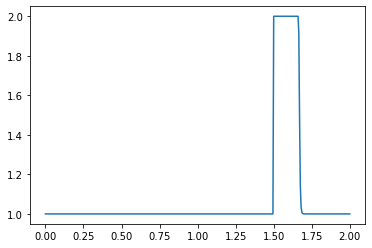

In [9]:
for n in range(nt):  # parcourir les instants de temps
    un = u.copy() # copier les valeurs existantes de u dans un
    for i in range(1, nx):  # maintenant nous allons parcourir le tableau u          
        ###Ci-dessous   la ligne de l'étape 1, copiée exactement. Modifiez-la 
        ###pour notre nouvelle équation.
        ### puis décommentez-la et exécutez la cellule pour évaluer l'étape 2       
        u[i] = un[i] - un[i]  * dt / dx * (un[i] - un[i-1])
        
      
      
         

        
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

Qu'observez-vous sur l'évolution de la fonction chapeau sous l'équation de convection non linéaire ? Que se passe-t-il lorsque vous modifiez les paramètres numériques et exécutez à nouveau ?

##  Pour en savoir plus

Pour une présentation détaillée de la discrétisation de l'équation de convection aux différences finies (et de toutes les étapes de 1 à 4), regardez la **Leçon  4** du professeur Barba sur YouTube.

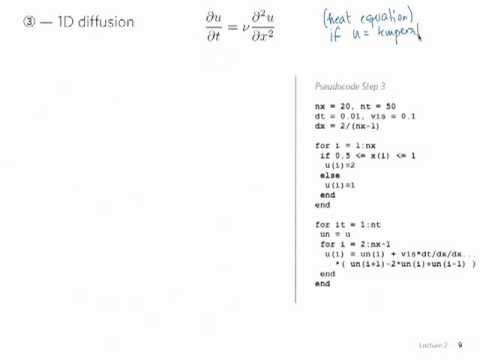

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')